In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1= pd.read_csv('C:/Users/richi/Datasets/Bengaluru_House_Data.csv')
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1['total_sqft'].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [6]:
df2= df1.drop(['area_type','availability','society','balcony'], axis= 'columns')
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [12]:
df3['bhk']= df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\3172804956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [13]:
df3.drop(['size'], axis= 1, inplace= True)
df3

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\2407460845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['size'], axis= 1, inplace= True)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [14]:
df3['bhk'].value_counts()
df3[df3.bhk>10]

,location,total_sqft,bath,price,bhk
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11
4684,Munnekollal,2400,40.0,660.0,43
4916,1Channasandra,1250,15.0,125.0,14
6533,Mysore Road,2232,6.0,300.0,12
7979,1 Immadihalli,6000,12.0,150.0,11


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float (x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [19]:
def convert_to_sqft(x):
    tokens =x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except: 
        return None

In [20]:
df3['sqft']= df3['total_sqft'].apply(convert_to_sqft)
df3

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\2944876596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sqft']= df3['total_sqft'].apply(convert_to_sqft)


,location,total_sqft,bath,price,bhk,sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Kothanur,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0
13316,Richards Town,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0


In [21]:
df3.drop(['total_sqft'], axis = 'columns', inplace = True)

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\3433132406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['total_sqft'], axis = 'columns', inplace = True)


In [22]:
df3[df3['sqft'].isnull()].value_counts

<bound method DataFrame.value_counts of                                            location  bath   price  bhk  sqft
410                                         Kengeri   1.0   18.50    1   NaN
648                                         Arekere   9.0  265.00    9   NaN
775                                    Basavanagara   2.0   93.00    1   NaN
872                               Singapura Village   2.0   45.00    2   NaN
1019                                 Marathi Layout   1.0  110.00    1   NaN
1086                                     Narasapura   2.0   29.50    2   NaN
1400                                     Chamrajpet   9.0  296.00    9   NaN
1712                               Singena Agrahara   3.0   95.00    3   NaN
1743                                      Hosa Road   3.0  115.00    3   NaN
1821                                       Sarjapur   3.0   76.00    3   NaN
2310                                     Whitefield   4.0  270.00    4   NaN
2881                             Vol

## Adding new column (Price per Sqft)

In [23]:
df3['ppsqft']= (df3['price']*100000)/(df3['sqft'])
df3

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\2083526546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ppsqft']= (df3['price']*100000)/(df3['sqft'])


,location,bath,price,bhk,sqft,ppsqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319


In [24]:
df3.isnull().sum()
df3= df3.dropna()
df3

,location,bath,price,bhk,sqft,ppsqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319


In [25]:
df3['location'] = df3['location'].apply(lambda x: x.strip())
location_stat = df3['location'].value_counts(ascending=False)
location_stat

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\992067147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['location'].apply(lambda x: x.strip())


Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [26]:
location_stat.values.sum()

13200

In [27]:
len(location_stat[location_stat<=10])

1047

In [28]:
len(location_stat[location_stat>10])

240

In [29]:
len(location_stat)

1287

In [31]:
location_stat_under_10 = location_stat[location_stat<=10]

In [32]:
location_stat_under_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [33]:
df3['location']= df3['location'].apply(lambda x: 'other' if x in location_stat_under_10 else x)


C:\Users\richi\AppData\Local\Temp\ipykernel_6944\2106022731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location']= df3['location'].apply(lambda x: 'other' if x in location_stat_under_10 else x)


In [34]:
df3['location'].nunique()

241

In [35]:
df3[['bhk','sqft']].sort_values('bhk',ascending= False)

,bhk,sqft
4684,43,2400.0
1718,27,8000.0
3379,19,2000.0
11559,18,1200.0
3609,16,10000.0
...,...,...
10527,1,500.0
3777,1,923.0
9575,1,994.0
12602,1,600.0


In [36]:
df3['sqft_per_bhk']= df3['sqft']/df3['bhk']
df3

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\1978984084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sqft_per_bhk']= df3['sqft']/df3['bhk']


,location,bath,price,bhk,sqft,ppsqft,sqft_per_bhk
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606,528.00
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615,650.00
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556,480.00
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861,507.00
4,Kothanur,2.0,51.00,2,1200.0,4250.000000,600.00
...,...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926,690.60
13316,other,5.0,400.00,4,3600.0,11111.111111,900.00
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136,570.50
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319,1172.25


In [38]:
df4= df3[~(df3['sqft_per_bhk']<350)]
df4

,location,bath,price,bhk,sqft,ppsqft,sqft_per_bhk
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606,528.00
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615,650.00
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556,480.00
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861,507.00
4,Kothanur,2.0,51.00,2,1200.0,4250.000000,600.00
...,...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926,690.60
13316,other,5.0,400.00,4,3600.0,11111.111111,900.00
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136,570.50
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319,1172.25


In [39]:
df4[df4['location'] == 'Whitefield']

,location,bath,price,bhk,sqft,ppsqft,sqft_per_bhk
5,Whitefield,2.0,38.00,2,1170.0,3247.863248,585.000000
10,Whitefield,2.0,70.00,3,1800.0,3888.888889,600.000000
11,Whitefield,5.0,295.00,4,2785.0,10592.459605,696.250000
27,Whitefield,3.0,81.00,3,1610.0,5031.055901,536.666667
47,Whitefield,2.0,94.82,2,1459.0,6498.971899,729.500000
...,...,...,...,...,...,...,...
13235,Whitefield,3.0,125.00,3,1730.0,7225.433526,576.666667
13257,Whitefield,2.0,58.00,3,1453.0,3991.741225,484.333333
13258,Whitefield,1.0,59.00,1,877.0,6727.480046,877.000000
13299,Whitefield,5.0,154.50,4,2856.0,5409.663866,714.000000


In [40]:
df4['ppsqft'].describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: ppsqft, dtype: float64

### There is a huge variation between min value= 268 and max value= 176471. We will remove the outlier using mean and one standard deviation.

In [41]:
def remove_ppsqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.ppsqft)
        st = np.std(subdf.ppsqft)
        reduced_df = subdf[(subdf.ppsqft>(m-st)) & (subdf.ppsqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_ppsqft_outliers(df4)
df5.shape

(9839, 7)

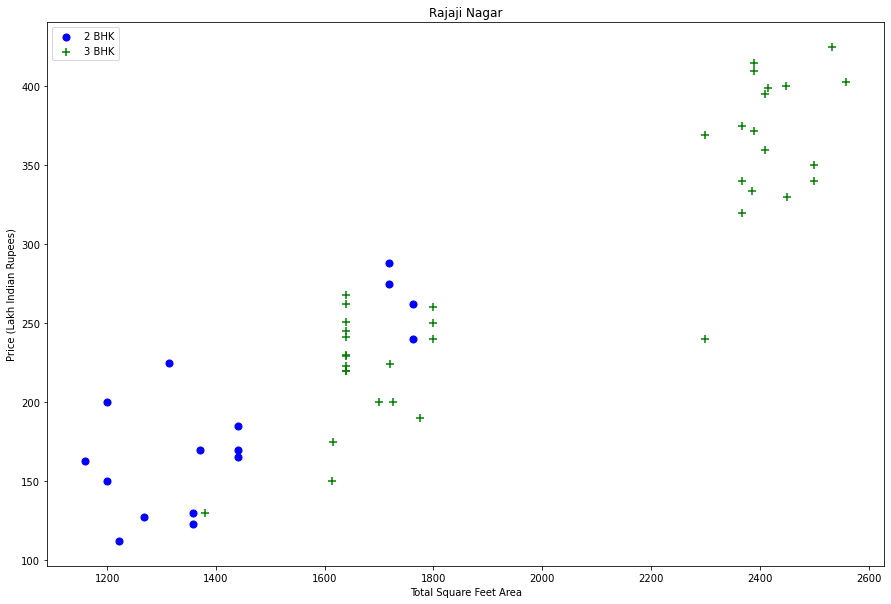

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

def plot_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter(df5,"Rajaji Nagar")


### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{ '1' : { 'mean': 4000, 'std: 2000, 'count': 34 }, '2' : { 'mean': 4300, 'std: 2300, 'count': 22 },
} 
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsqft),
                'std': np.std(bhk_df.ppsqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [44]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7023, 7)

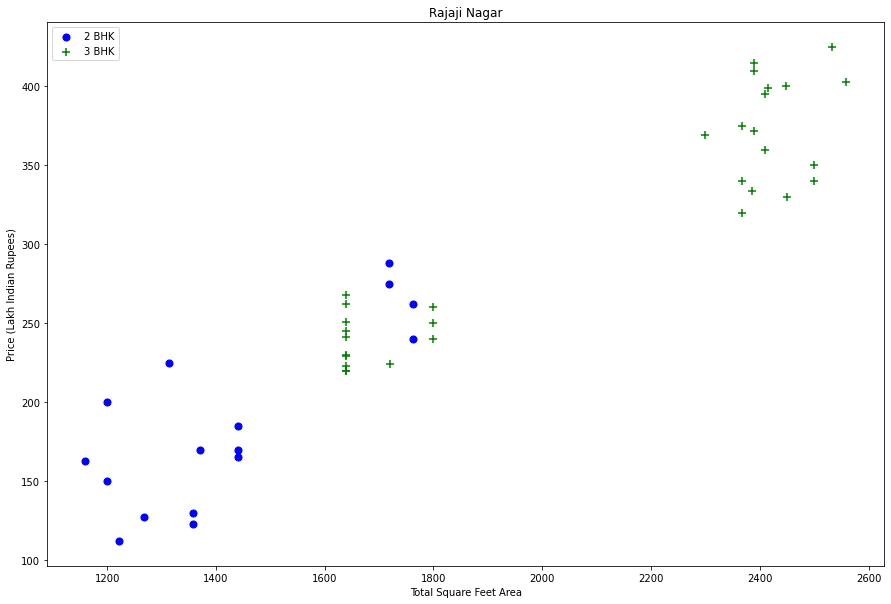

In [45]:
plot_scatter(df6, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

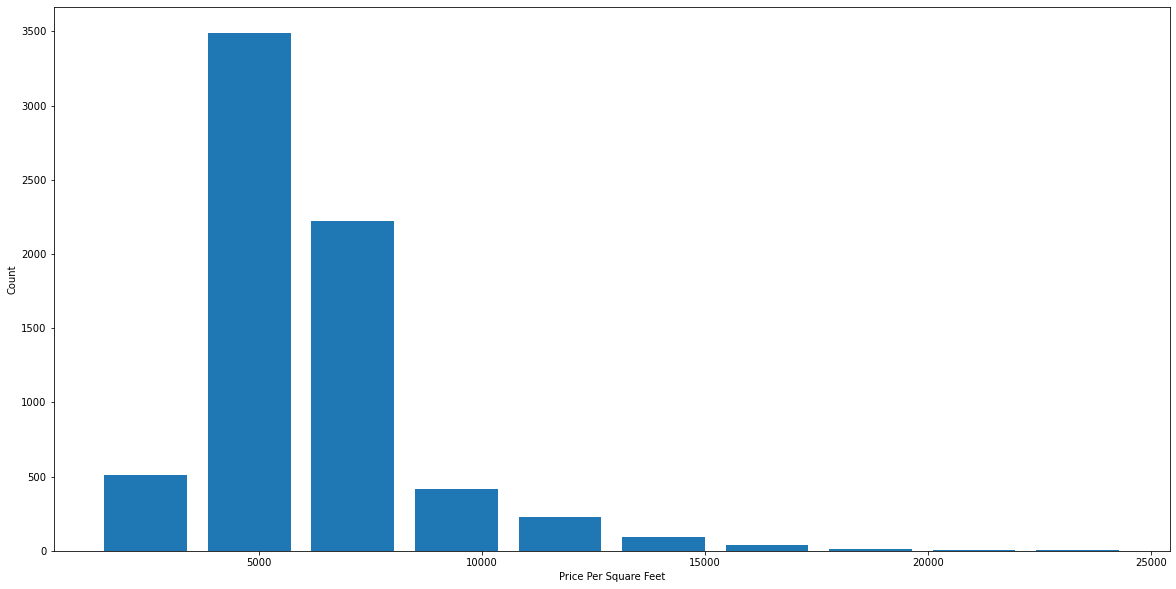

In [46]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.ppsqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#looks perfect bell curve

### Removing records where number of bathrooms >10 and are more than the number of rooms.

In [48]:
df7 = df6[(df6['bath']<=df6['bhk']) & (df6['bath']<=10)]
df7

,location,bath,price,bhk,sqft,ppsqft,sqft_per_bhk
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860,712.500000
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491,543.333333
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333,625.000000
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333,400.000000
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668,617.500000
...,...,...,...,...,...,...,...
9828,other,2.0,64.0,2,1155.0,5541.125541,577.500000
9830,other,2.0,70.0,2,1200.0,5833.333333,600.000000
9831,other,1.0,200.0,1,1800.0,11111.111111,1800.000000
9834,other,2.0,110.0,2,1353.0,8130.081301,676.500000


In [49]:
df7.drop(['ppsqft','sqft_per_bhk'], axis = 1, inplace= True)

C:\Users\richi\AppData\Local\Temp\ipykernel_6944\4216092080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop(['ppsqft','sqft_per_bhk'], axis = 1, inplace= True)


In [50]:
len(df7)

6586

In [51]:
dummies=pd.get_dummies(df7['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df8=pd.concat([df7,dummies.drop("other",axis=1)],axis=1)   #remember to specify the axis
df8.head()

,location,bath,price,bhk,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df9= df8.drop('location', axis=1)
df9

,bath,price,bhk,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,2.0,64.0,2,1155.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9830,2.0,70.0,2,1200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,1.0,200.0,1,1800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9834,2.0,110.0,2,1353.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training

In [58]:
X=df9.drop("price",axis=1)
y=df9.price

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.8698185774849234

## Model Testing

In [63]:
predictions= lm.predict(X_test)
predictions

array([51.13021974, 91.01985963, 68.84388309, ..., 81.4482062 ,
       78.17312066, 80.92355751])

In [64]:
y_test

776      65.00
9830     70.00
3381     47.88
9482     17.00
7655     55.68
         ...  
36       56.00
4380    170.00
665      86.00
5279     55.00
1778     93.36
Name: price, Length: 1318, dtype: float64

In [65]:
(predictions- y_test)

776    -13.869780
9830    21.019860
3381    20.963883
9482     7.636506
7655     0.075407
          ...    
36       4.117083
4380    -2.436279
665     -4.551794
5279    23.173121
1778   -12.436442
Name: price, Length: 1318, dtype: float64

Text(0, 0.5, 'predictions')

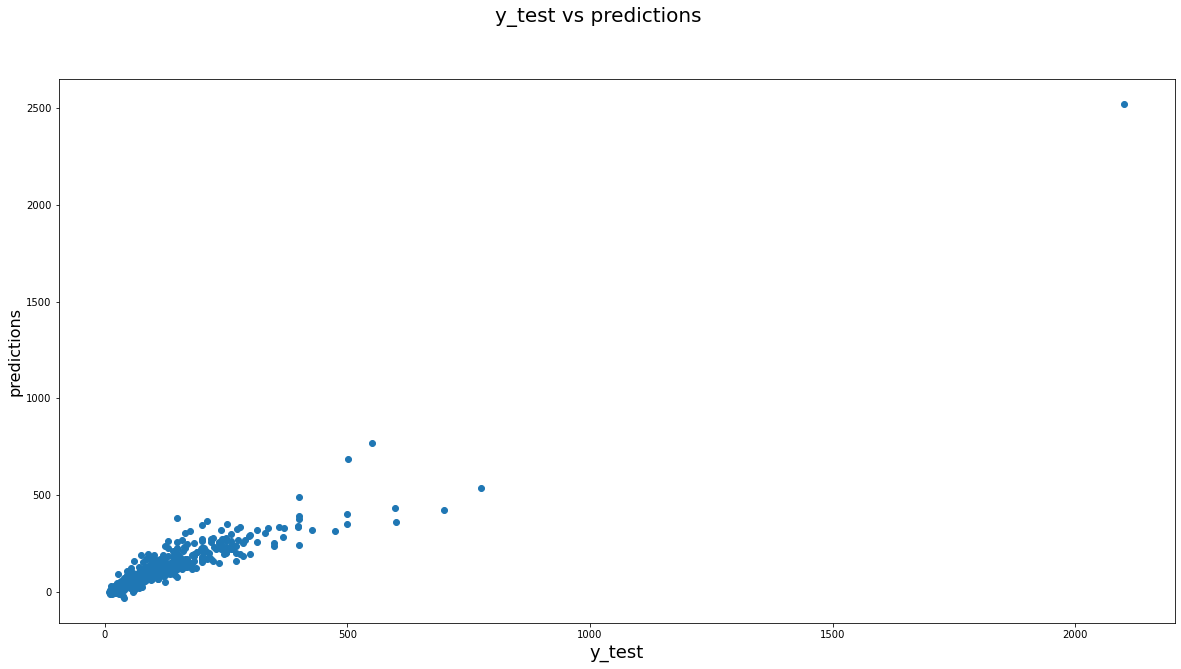

In [66]:
fig = plt.figure()
plt.scatter(y_test,predictions)
fig.suptitle('y_test vs predictions', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('predictions', fontsize=16)                          # Y-label

C:\Users\richi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


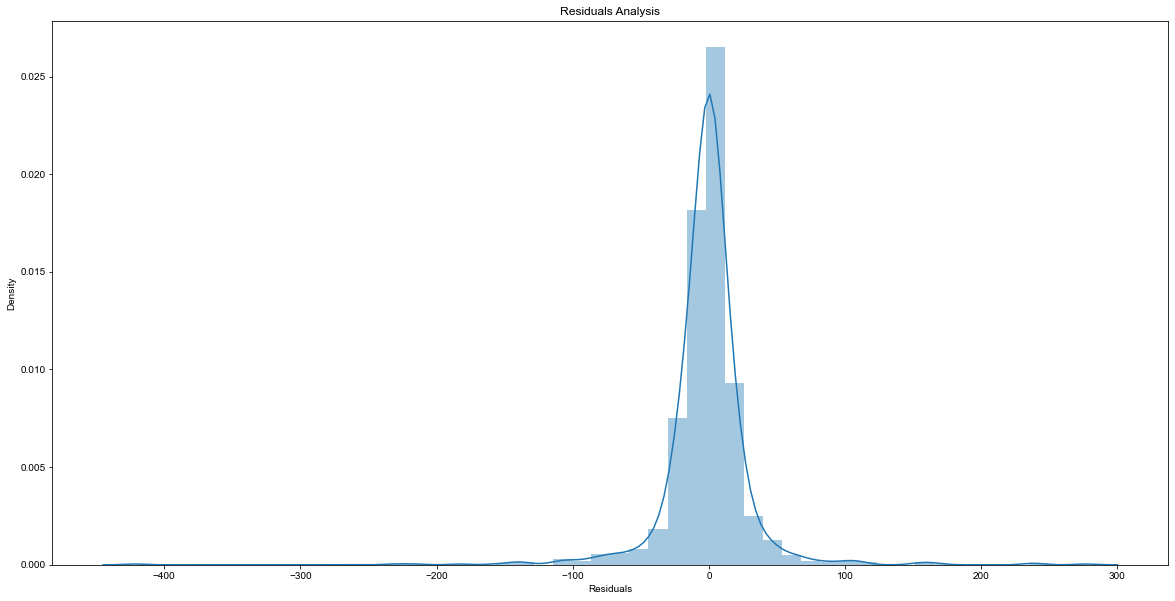

In [67]:
import seaborn as sns
a= sns.distplot(y_test-predictions)
a.set_xlabel('Residuals')
a.set_title('Residuals Analysis')
sns.set(font_scale=2)

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 17.291186062423574
MSE: 1072.096104148329
RMSE: 32.74287867839859


In [69]:
metrics.explained_variance_score(y_test, predictions)   # r squared value

0.8699991983760976

In [70]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\richi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\richi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.838069,{'normalize': False}
1,lasso,0.696964,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.750063,"{'criterion': 'mse', 'splitter': 'best'}"


In [71]:
def predict_price(location,bath,bhk,sqft):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = bhk
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lm.predict([x])[0]

In [94]:
predict_price('Indira Nagar',2,2,1000)

C:\Users\richi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


169.22858614006233

### Exporting the model

In [95]:
import pickle
with open('bangalore_house_price_model.pickle','wb') as f:
    pickle.dump(lm,f)

In [96]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [101]:
df2[df2['location']== 'Ejipura']

,location,size,total_sqft,bath,price
193,Ejipura,7 Bedroom,1800,7.0,250.0
1497,Ejipura,3 BHK,1650,3.0,110.0
5730,Ejipura,2 Bedroom,922,2.0,70.0
6417,Ejipura,2 BHK,1190,2.0,70.0
6485,Ejipura,3 BHK,2070,3.0,135.0
6711,Ejipura,3 BHK,1600,3.0,95.0
9956,Ejipura,2 BHK,1210,2.0,75.0
11680,Ejipura,2 BHK,1200,2.0,60.0
11826,Ejipura,5 Bedroom,1356,5.0,139.0
